# HOUSING PRICE CASE STUDY


## <font color="blue">Introduction
> A US-based housing company named Surprise Housing has decided to enter into the Australian market. The company planning to use data analytics to purchase houses at prices lower than their actual prices by predicting the actual prices of the houses.
    
## <font color="blue">Problem Statement
> Surprise Housing company wants to purchase houses below their acual prices and flip them on at a higher price. For the same purpose the company has collected the dataset from the sale of houses in australian market.The company is looking at prospective properties to buy to enter into the australian market. So we are required to build a regression model that can predict the prices of the houses using regularization techniques and decide whether to invest in them or not.
> 1. The company wants to find out:
    >> -  The variables that are significant in predicting the price of a house.
    >> -  How well those variables describe the price of a house.
> 2. And to determine the optimal value of lambda for ridge and lasso regression.
    
## <font color="blue">Business Objectives
> We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.
    

## <font color="blue">Data Understanding and Cleaning

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# Customizing the settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x:"%.4f" %x)
pd.set_option("display.width",100)

In [3]:
# Importing the data
Housing = pd.read_csv("train.csv", index_col=0)
Housing.columns.name = "Features"

# Displaying first five columns of the dataset
Housing.head()

Features,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


SalePrice is the response variable which we need to predict

In [4]:
# Checking the shape of the dataset
print("The shape of the housing dataset is",Housing.shape)

The shape of the housing dataset is (1460, 80)


In [5]:
# Cheking the information
Housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
# Checking the value counts of the features
for index,i in enumerate(Housing.columns):
    print("\033[1m"+str(index+1)+") "+i+"\033[0m")
    print(Housing[i].value_counts())
    print("\n")

1) MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


2) MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


3) LotFrontage
60.0000     143
70.0000      70
80.0000      69
50.0000      57
75.0000      53
           ... 
112.0000      1
138.0000      1
149.0000      1
38.0000       1
111.0000      1
Name: LotFrontage, Length: 110, dtype: int64


4) LotArea
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
13031     1
10991     1
8944      1
6897      1
8190      1
Name: LotArea, Length: 1073, dtype: int64


5) Street
Pave    1454
Grvl       6
Name: Street, dtype: int64


6) Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64


7) LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


8) LandContour
Lvl    1311
Bn

In [7]:
# Checking for duplicates
Housing[Housing.duplicated()]

Features,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


No duplicates found in the dataset

### Dropping reduntant columns

In [8]:
# In utilities column 99.9% data were same unique category(AllPub) thus it is not usefull for our analysis
print(Housing["Utilities"].value_counts())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [9]:
# Dropping utilities column
Housing.drop("Utilities", axis=1, inplace=True)

### Missing Values Treatment

In [10]:
# As we saw in the data dictionary that for some columns "NA" represents not present of the features.

# Let's create a function for replacing
def impute(col,name):
    Housing[col] = Housing[col].replace(np.nan, name)
    
# So lets impute the NA with corresponding names
impute("Alley","No_Alley")
impute("BsmtQual","No_Bsmt")
impute("BsmtCond","No_Bsmt")
impute("BsmtExposure","No_Bsmt")
impute("BsmtFinType1","No_Bsmt")
impute("BsmtFinType2","No_Bsmt")
impute("FireplaceQu","No_Fireplace")
impute("GarageType","No_Garage")
impute("GarageFinish","No_Garage")
impute("GarageQual","No_Garage")
impute("GarageCond","No_Garage")
impute("PoolQC","No_pool")
impute("Fence","No_Fence")
impute("MiscFeature","No_Miscfeatures")

In [11]:
# Checking the missing values
Miss_percentage = round((Housing.isnull().sum()/Housing.shape[0])*100,2).to_frame("Null_%")

# sorting the missing values columns
Miss_percentage[Miss_percentage["Null_%"]>0].sort_values(by="Null_%", ascending=False)

,Null_%
Features,
LotFrontage,17.7400
GarageYrBlt,5.5500
MasVnrType,0.5500
MasVnrArea,0.5500
Electrical,0.0700


In [12]:
# Checking the statistical info of LotFrontage column
Housing["LotFrontage"].describe()

count   1201.0000
mean      70.0500
std       24.2848
min       21.0000
25%       59.0000
50%       69.0000
75%       80.0000
max      313.0000
Name: LotFrontage, dtype: float64

In [13]:
# We can impute the missing values with mean or median, as both were almost same
Housing.loc[Housing["LotFrontage"].isnull(), "LotFrontage"] = Housing["LotFrontage"].mean()

In [14]:
# Checking the statistical info of MasVnrType
Housing["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [15]:
# lets impute with most frequent category
Housing.loc[Housing["MasVnrType"].isnull(), "MasVnrType"] = Housing["MasVnrType"].mode()[0]

In [16]:
# Checking the statistical info of MasVnrArea
Housing["MasVnrArea"].value_counts().head(3)

0.0000      861
108.0000      8
72.0000       8
Name: MasVnrArea, dtype: int64

In [17]:
# lets impute with most frequent category
Housing.loc[Housing["MasVnrArea"].isnull(), "MasVnrArea"] = Housing["MasVnrArea"].mode()[0]

In [18]:
# Checking the statistical info of MasVnrArea
Housing["Electrical"].value_counts().head(3)

SBrkr    1334
FuseA      94
FuseF      27
Name: Electrical, dtype: int64

In [19]:
# lets impute with most frequent category
Housing.loc[Housing["Electrical"].isnull(), "Electrical"] = Housing["Electrical"].mode()[0]

In [20]:
# Checking the statistical info of MasVnrArea
Housing["GarageYrBlt"].value_counts().head(3)

2005.0000    65
2006.0000    59
2004.0000    53
Name: GarageYrBlt, dtype: int64

In [21]:
# lets impute with most frequent category
Housing.loc[Housing["GarageYrBlt"].isnull(), "GarageYrBlt"] = Housing["GarageYrBlt"].mode()[0]

In [22]:
# Let's check the missing values in the dataset
Housing.isnull().sum().sort_values(ascending=True)

Features
MSSubClass     0
GarageType     0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrType     0
Exterior2nd    0
Exterior1st    0
BsmtQual       0
SalePrice      0
Length: 79, dtype: int64

### Sanity checks

In [23]:
# The year of yrsold should be after the yearbuilt
Housing[Housing["YrSold"] < Housing["YearBuilt"]]

Features,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


No insanity in data

### Handling Incorrect Datatypes

In [24]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [25]:
# we have two columns YearBuilt and YrSold, Which we can convert into a single column named age
Housing["House_Age"] = Housing["YrSold"] - Housing["YearBuilt"]
Housing['Remod_Age'] = Housing['YrSold'] - Housing['YearRemodAdd']
Housing['Garage_Age'] = Housing['YrSold'] - Housing['GarageYrBlt']

#### <font color="blue"> Derived column:
>   #### 1.House_Age:  
> Age of the house derived from YearBuild and YrSold
>   #### 2.Remod_Age:  
> Age of the house after remodelling derived from YearRemoAadd and YrSold
>   #### 3.Garage_Age:  
> Age of the garage derived from GarageYrBlt and YrSold

In [26]:
# Let's check the statistical info of Age columns to create buckets
age_list = ["House_Age","Remod_Age","Garage_Age"]
for i in age_list:
    print("\033[1m"+i+"\033[0m")
    print(Housing[i].describe(percentiles=(0.1,0.2,0.4,0.6,0.8,1)))

House_Age
count   1460.0000
mean      36.5479
std       30.2502
min        0.0000
10%        1.0000
20%        5.0000
40%       24.0000
50%       35.0000
60%       42.4000
80%       60.2000
100%     136.0000
max      136.0000
Name: House_Age, dtype: float64
Remod_Age
count   1460.0000
mean      22.9500
std       20.6407
min       -1.0000
10%        1.0000
20%        3.0000
40%        9.6000
50%       14.0000
60%       28.0000
80%       47.0000
100%      60.0000
max       60.0000
Name: Remod_Age, dtype: float64
Garage_Age
count   1460.0000
mean      27.8397
std       24.7830
min        0.0000
10%        1.0000
20%        3.0000
40%       12.0000
50%       23.5000
60%       33.0000
80%       49.2000
100%     107.0000
max      107.0000
Name: Garage_Age, dtype: float64


In [27]:
# Let's bucket the HouseAge column into 04 bins
Housing["Age_bins"] = pd.cut(Housing["House_Age"],bins=[-1,5,24,35,42,60,140], labels=["<6","6-24","25-35","36-42","43-60",">60"])
Housing["Remod_Age_bins"] = pd.cut(Housing["Remod_Age"],bins=[-2,3,9,14,28,47,65], labels=["<3","4-9","10-14","15-28","29-47",">47"])
Housing["Garage_Age_bins"] = pd.cut(Housing["Garage_Age"],bins=[-1,4,15,28,35,51,110], labels=["<3","4-9","10-14","15-28","29-47",">47"])

#### <font color="blue"> Derived column:
>   #### 1.Age_bins:
Binning of House age group as [<6,6-24,25-35,36-42,43-60,>60]
>   #### 2.Remod_Age_bins:
Binning of Remod age group as[<3,4-9,10-14,15-28,29-47,>47]
>   #### 3.Garage_Age_bins:
Binning of Garage age group as [<3,4-9,10-14,15-28,29-47,>47]

In [28]:
# Let's drop reduntant columns, as we derived the age buckets from all the features
Housing.drop(["YrSold","YearBuilt","YearRemodAdd","GarageYrBlt","House_Age","Remod_Age","Garage_Age"], axis=1, inplace=True)

In [29]:
# Changing the MSSubClass into categorical
Housing=Housing.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

In [30]:
# some of the columns are supposed to be categorical but is in numeric so we need to change the datatype
# Converting numeric to categorical type
Housing['OverallQual'] = Housing['OverallQual'].astype('object')
Housing['OverallCond'] = Housing['OverallCond'].astype('object')

In [31]:
#changing months to categorical
import calendar

Housing['MonthSold'] = Housing['MoSold'].apply(lambda x: calendar.month_name[x])
Housing = Housing.drop(['MoSold'], axis=1)

In [32]:
# We have some ordinal features, thus we can perform label encoding for the following features 
Housing = Housing.replace({"BsmtCond":{"No_Bsmt" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Bsmt" : 0, "No" : 2, "Mn" : 2, "Av": 3, "Gd" : 4},
                       "BsmtFinType1": {"No_Bsmt" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3,  "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Bsmt" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Bsmt" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3,  "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3,  "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3,  "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3,  "Ex" : 4},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})

In [33]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MSSubClass       1460 non-null   object  
 1   MSZoning         1460 non-null   object  
 2   LotFrontage      1460 non-null   float64 
 3   LotArea          1460 non-null   int64   
 4   Street           1460 non-null   object  
 5   Alley            1460 non-null   object  
 6   LotShape         1460 non-null   int64   
 7   LandContour      1460 non-null   int64   
 8   LotConfig        1460 non-null   object  
 9   LandSlope        1460 non-null   int64   
 10  Neighborhood     1460 non-null   object  
 11  Condition1       1460 non-null   object  
 12  Condition2       1460 non-null   object  
 13  BldgType         1460 non-null   object  
 14  HouseStyle       1460 non-null   object  
 15  OverallQual      1460 non-null   object  
 16  OverallCond      1460 non-null   object  


### Outliers Analysis

In [34]:
# lets extract the numeric columns
Num_df = Housing.select_dtypes(include=["int64","float64"])

# Extracting the categorical columns
Cat_df = Housing.select_dtypes(include=["category","object"])

In [35]:
Num_df.columns.shape

(49,)

In [36]:
Cat_df.columns.shape

(29,)

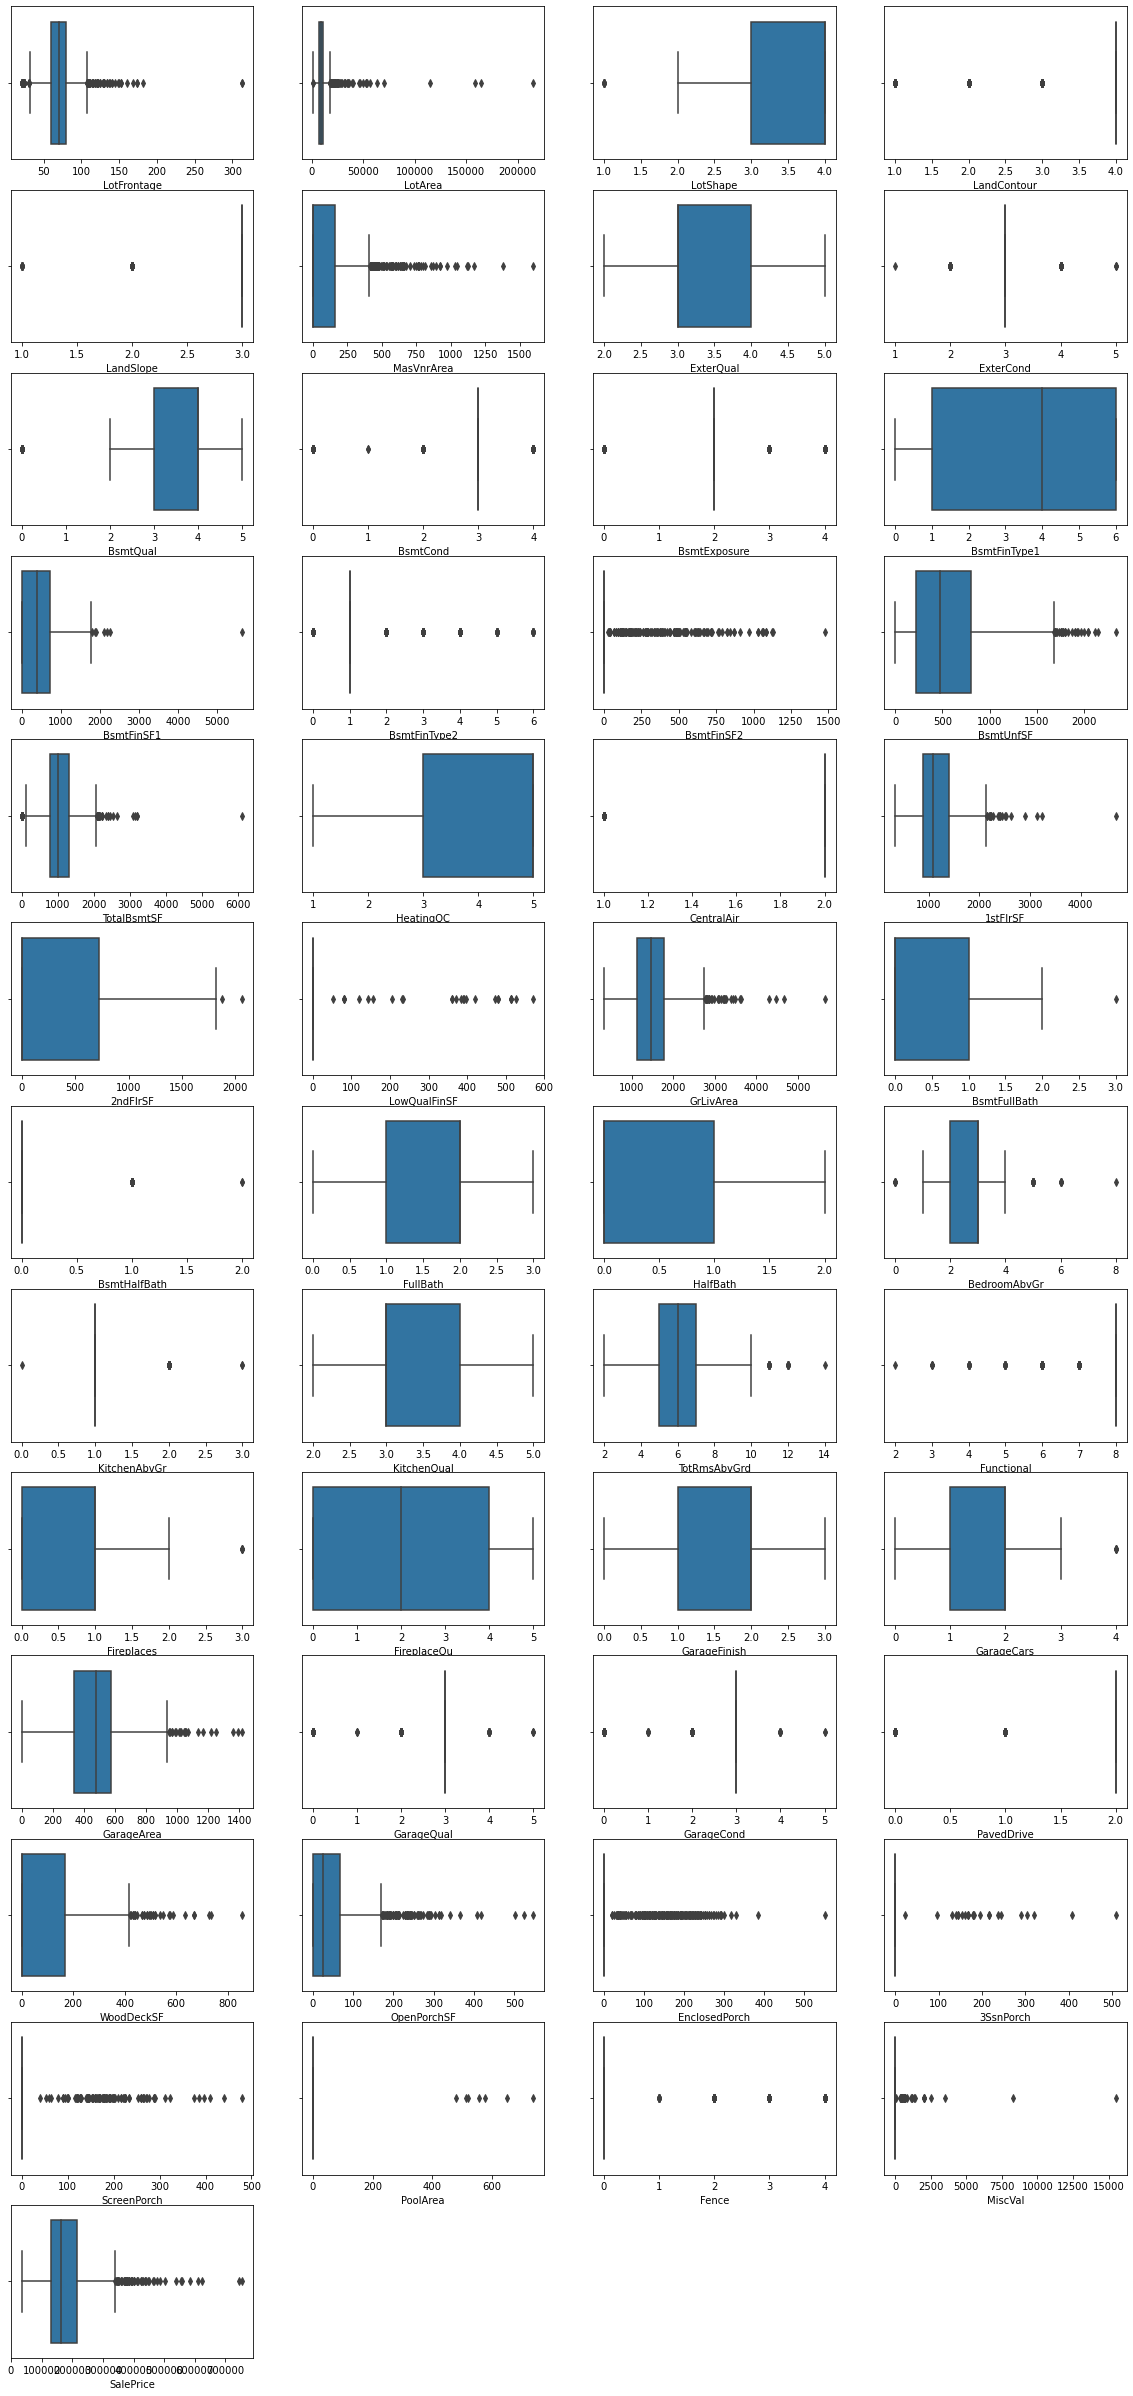

In [37]:
# Lets plot the boxplots for all the numeric features to detect the outliers
a = 1
plt.figure(figsize=[20,50])
for index,i in enumerate(Num_df.columns):
    plt.subplot(15,4,a)
    sns.boxplot(data=Num_df, x=i)
    a +=1

We can see that there are some outliers present in some numeric features

In [38]:
Housing.describe()

Features,LotFrontage,LotArea,LotShape,LandContour,LandSlope,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SalePrice
count,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000
mean,70.0500,10516.8281,3.5918,3.8144,2.9377,103.1171,3.3959,3.0836,3.4890,2.9349,2.2829,3.5459,443.6397,1.2473,46.5493,567.2404,1057.4295,4.1452,1.9349,1162.6267,346.9925,5.8445,1515.4637,0.4253,0.0575,1.5651,0.3829,2.8664,1.0466,3.5116,6.5178,7.8418,0.6130,1.8253,1.7158,1.7671,472.9801,2.8103,2.8089,1.8562,94.2445,46.6603,21.9541,3.4096,15.0610,2.7589,0.5658,43.4890,180921.1959
std,22.0240,9981.2649,0.5823,0.6065,0.2762,180.7314,0.5743,0.3511,0.8765,0.5522,0.7369,2.1078,456.0981,0.8923,161.3193,441.8670,438.7053,0.9595,0.2467,386.5877,436.5284,48.6231,525.4804,0.5189,0.2388,0.5509,0.5029,0.8158,0.2203,0.6638,1.6254,0.6677,0.6447,1.8109,0.8928,0.7473,213.8048,0.7229,0.7197,0.4966,125.3388,66.2560,61.1191,29.3173,55.7574,40.1773,1.2045,496.1230,79442.5029
min,21.0000,1300.0000,1.0000,1.0000,1.0000,0.0000,2.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,334.0000,0.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,34900.0000
25%,60.0000,7553.5000,3.0000,4.0000,3.0000,0.0000,3.0000,3.0000,3.0000,3.0000,2.0000,1.0000,0.0000,1.0000,0.0000,223.0000,795.7500,3.0000,2.0000,882.0000,0.0000,0.0000,1129.5000,0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,3.0000,5.0000,8.0000,0.0000,0.0000,1.0000,1.0000,334.5000,3.0000,3.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,129975.0000
50%,70.0500,9478.5000,4.0000,4.0000,3.0000,0.0000,3.0000,3.0000,4.0000,3.0000,2.0000,4.0000,383.5000,1.0000,0.0000,477.5000,991.5000,5.0000,2.0000,1087.0000,0.0000,0.0000,1464.0000,0.0000,0.0000,2.0000,0.0000,3.0000,1.0000,3.0000,6.0000,8.0000,1.0000,2.0000,2.0000,2.0000,480.0000,3.0000,3.0000,2.0000,0.0000,25.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,163000.0000
75%,79.0000,11601.5000,4.0000,4.0000,3.0000,164.2500,4.0000,3.0000,4.0000,3.0000,2.0000,6.0000,712.2500,1.0000,0.0000,808.0000,1298.2500,5.0000,2.0000,1391.2500,728.0000,0.0000,1776.7500,1.0000,0.0000,2.0000,1.0000,3.0000,1.0000,4.0000,7.0000,8.0000,1.0000,4.0000,2.0000,2.0000,576.0000,3.0000,3.0000,2.0000,168.0000,68.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,214000.0000
max,313.0000,215245.0000,4.0000,4.0000,3.0000,1600.0000,5.0000,5.0000,5.0000,4.0000,4.0000,6.0000,5644.0000,6.0000,1474.0000,2336.0000,6110.0000,5.0000,2.0000,4692.0000,2065.0000,572.0000,5642.0000,3.0000,2.0000,3.0000,2.0000,8.0000,3.0000,5.0000,14.0000,8.0000,3.0000,5.0000,3.0000,4.0000,1418.0000,5.0000,5.0000,2.0000,857.0000,547.0000,552.0000,508.0000,480.0000,738.0000,4.0000,15500.0000,755000.0000


In [39]:
# lets create a function to remove outliers below quantile 0.02 and above quantile 0.98
def remove_outliers(dtf, numl_list):
    for j in numl_list:
        Q1 = dtf[j].quantile(0.05)
        Q3 = dtf[j].quantile(0.95)
        IQR = Q3 - Q1       
        dtf = dtf[(dtf[j] >= Q1-2.5*IQR) & (dtf[j] <= Q3+2.5*IQR)]
    return dtf

# lets create a list of numeric variables that should be treated for outliers
Num_list = ['LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LandSlope',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'Fence', 'MiscVal',
       'SalePrice']

# Lets remove the outliers
Housing = remove_outliers(Housing,Num_list)

In [40]:
print("The shape of the housing dataset after removing the outliers is",Housing.shape)

The shape of the housing dataset after removing the outliers is (1252, 78)


### Exploring Data

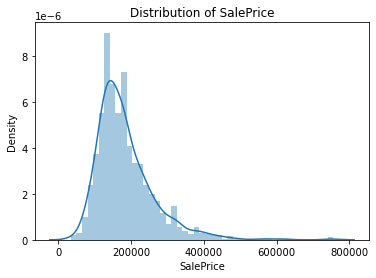

In [41]:
# Checking the distribution of salePrice
sns.distplot(Housing["SalePrice"])
plt.title("Distribution of SalePrice")
plt.show()

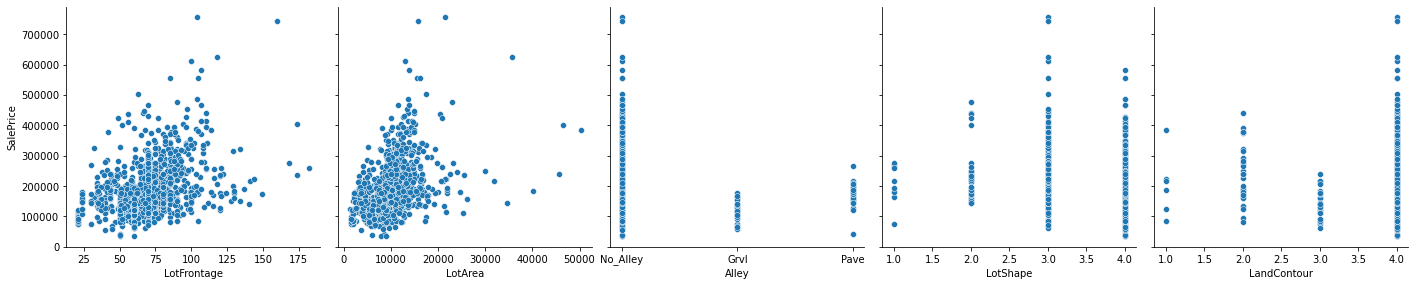

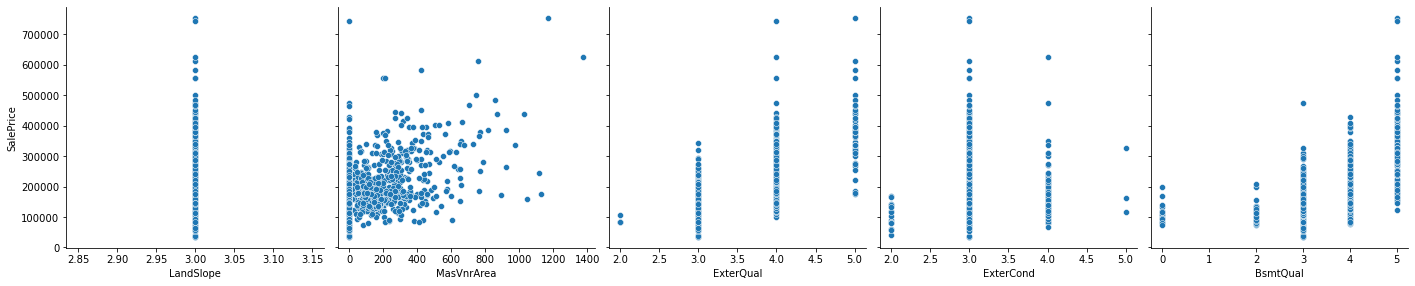

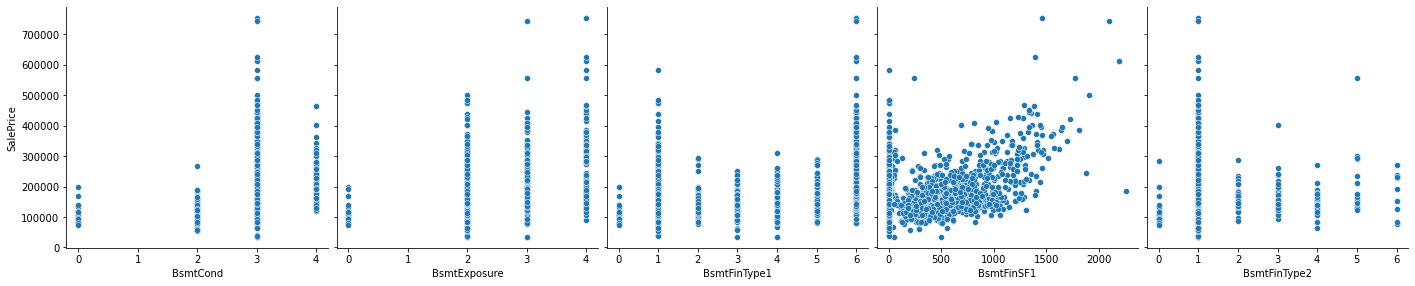

In [42]:
# Creating a function to create pairplot with respect to Saleprice
def pairplt(a,b,c,d,e):
    sns.pairplot(Housing, x_vars=[a,b,c,d,e], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pairplt('LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour')
pairplt('LandSlope','MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual')
pairplt('BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2')

#### <font color="blue">Inference from the plot:
> - Higher lotfrontage leads to higher salesprice.
> - Lotarea and salesprice is positively correlated.
> - If masonry veneer area increases the salesprice also increases.
> - Salesprice has a positive correlation with Exterior quality.
> - Salesprice is positively correlated with Exterior condition.
> - Good basement quality leads to higher salesprice.
> - Basement condition and exposure is positively correlated with salesprice.

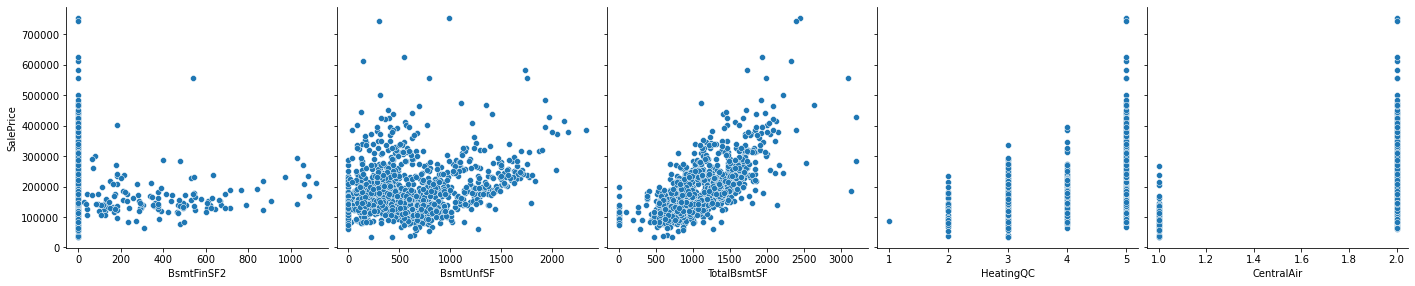

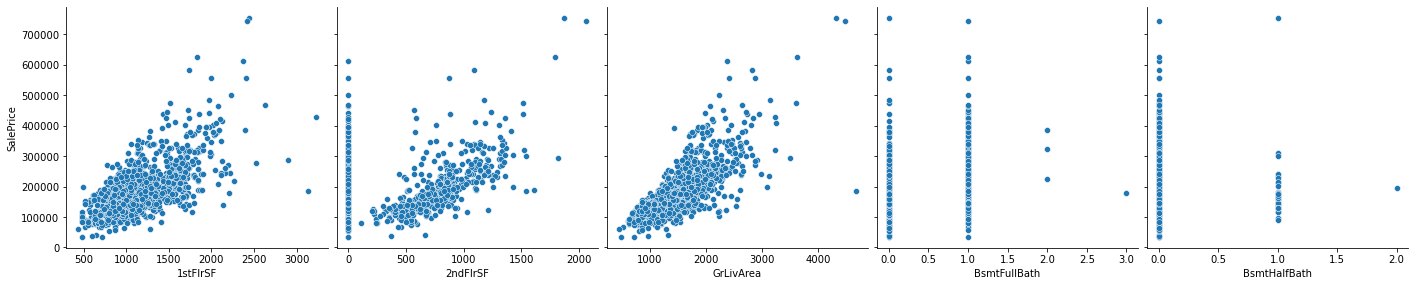

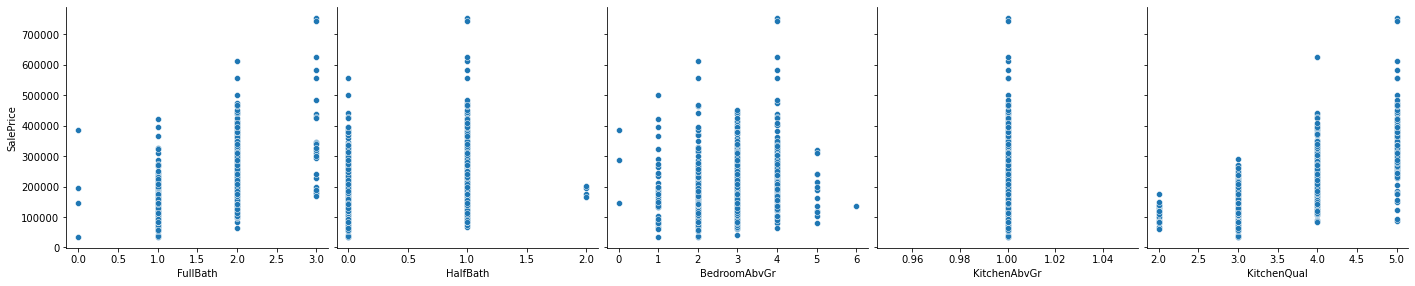

In [43]:
# Plotting pairplot for some features
pairplt('BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','HeatingQC', 'CentralAir')
pairplt('1stFlrSF', '2ndFlrSF', 'GrLivArea','BsmtFullBath', 'BsmtHalfBath')
pairplt('FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','KitchenQual')

#### <font color="blue">Inference from the plot:
> - Salesprice increase with increase in total basement surface.
> - Heating quality and salesprice is positively correlated.
> - first floor surface area and second floor surface area is positively correlated with salesprice.
> - If above ground living area is more than the salesprice increases.
> - If full bathrooms above ground is more than salesprice increases
> - Good kitchen quality leads to higher salesprice.

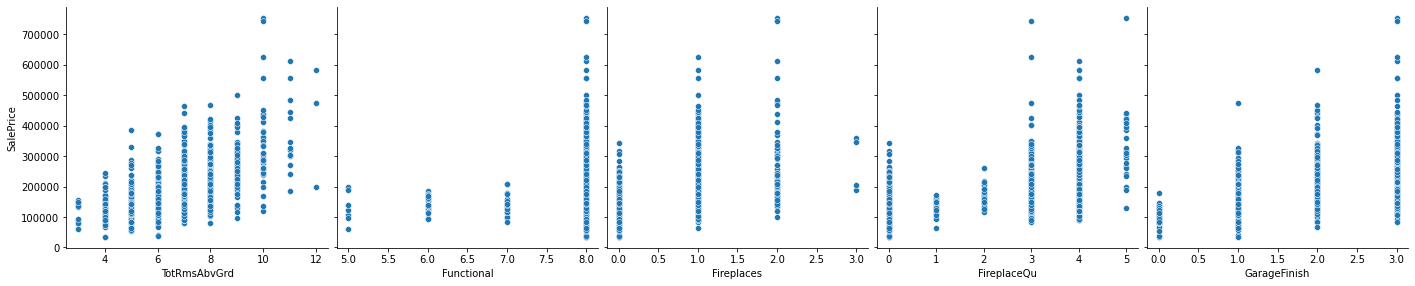

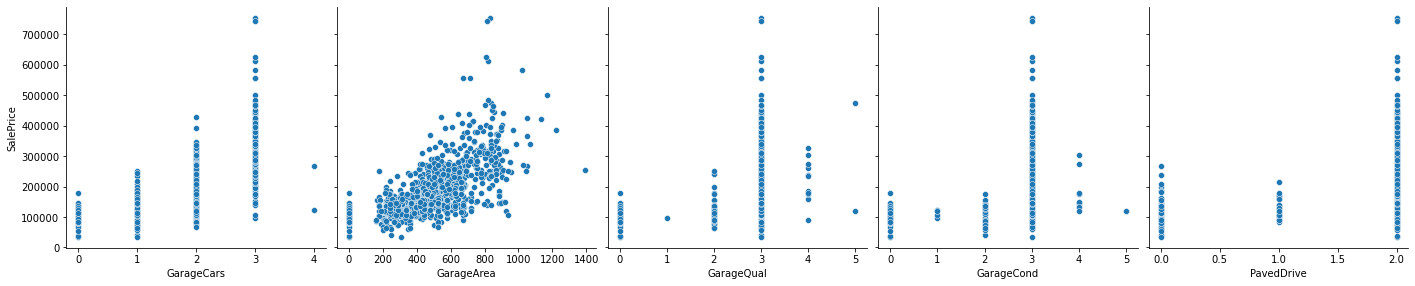

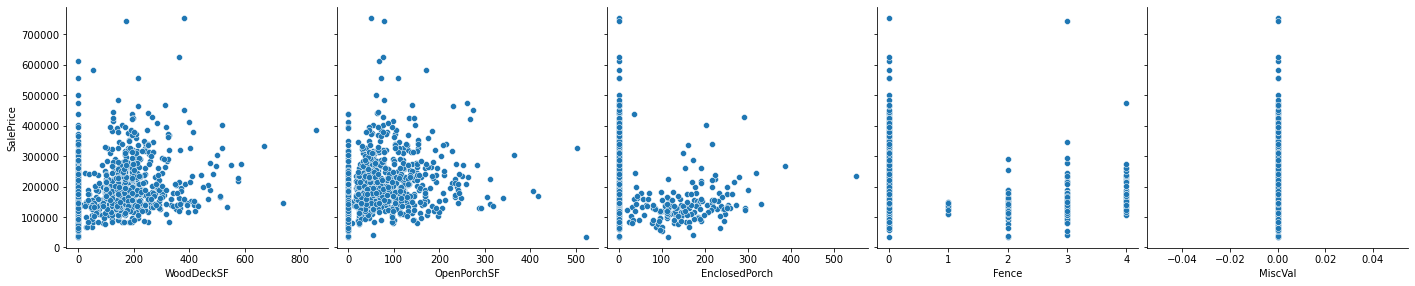

In [44]:
# Plotting pairplot for some features
pairplt('TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish')
pairplt('GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive')
pairplt('WoodDeckSF','OpenPorchSF', 'EnclosedPorch', 'Fence', 'MiscVal')

#### <font color="blue">Inference from the plot:
> - If total rooms above ground is more the salesprice increases.
> - Fireplace quality and salesprice is positively correlated.
> - Goodness in garagefinish is positively correlated with salesprice.
> - If sizes of garage in car capacity is more than the salesprice increases.
> - If garage area is more than salesprice increases

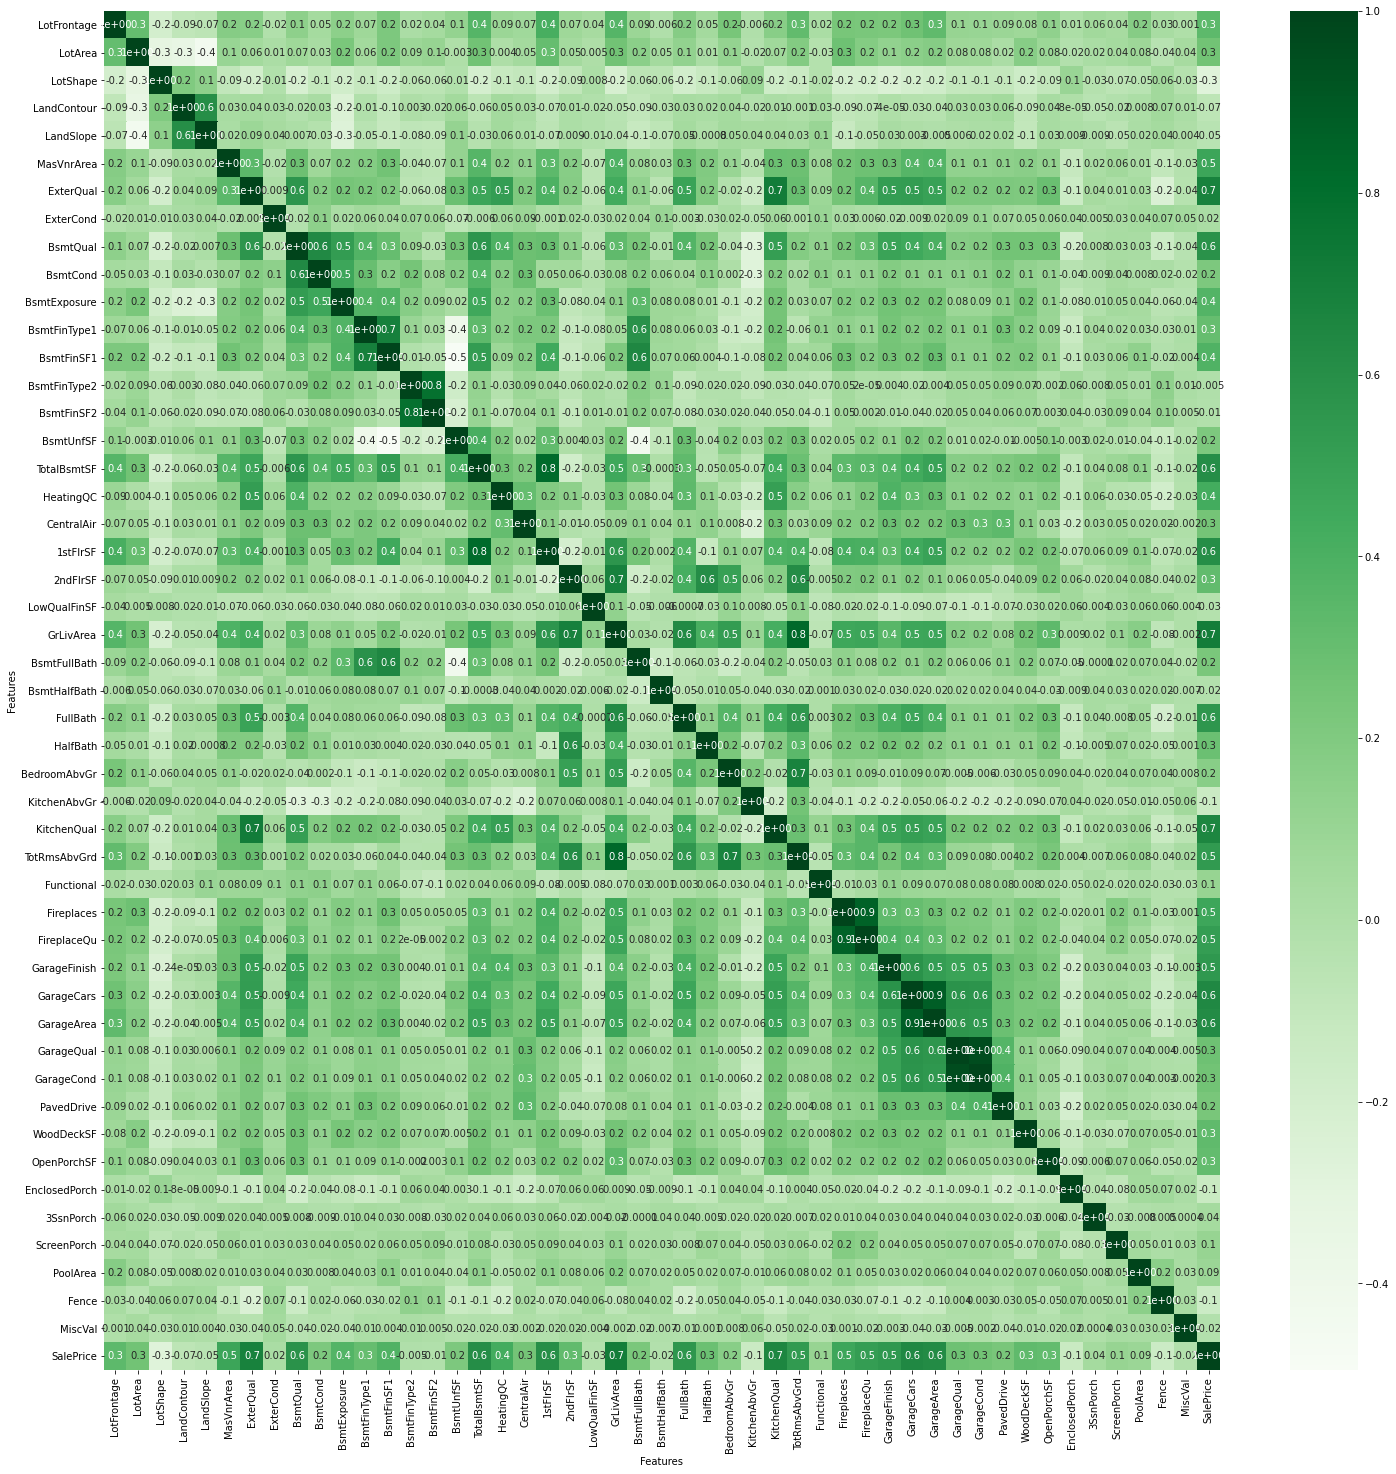

In [45]:
# Lets create a heatmap to identify highly correlated features
plt.figure(figsize=[25,25])
sns.heatmap(Num_df.corr(), cmap="Greens", annot=True, fmt="0.1")
plt.show()

#### <font color="blue">Inference from the plot:
> - first floor surface area and total basement surface area is highly correlated with r value of around +0.8
> - Exterior quality and kitchen quality are highly correlated with r value of around +0.7.
> - Total rooms above ground is positively correlated with ground living area with r value of around +0.8.
> - Total rooms above ground and bedrooms above ground is positively correlated with r value of around +0.7.
> - Basement finished surface area is negatively correlated with basement unfinished surface area.

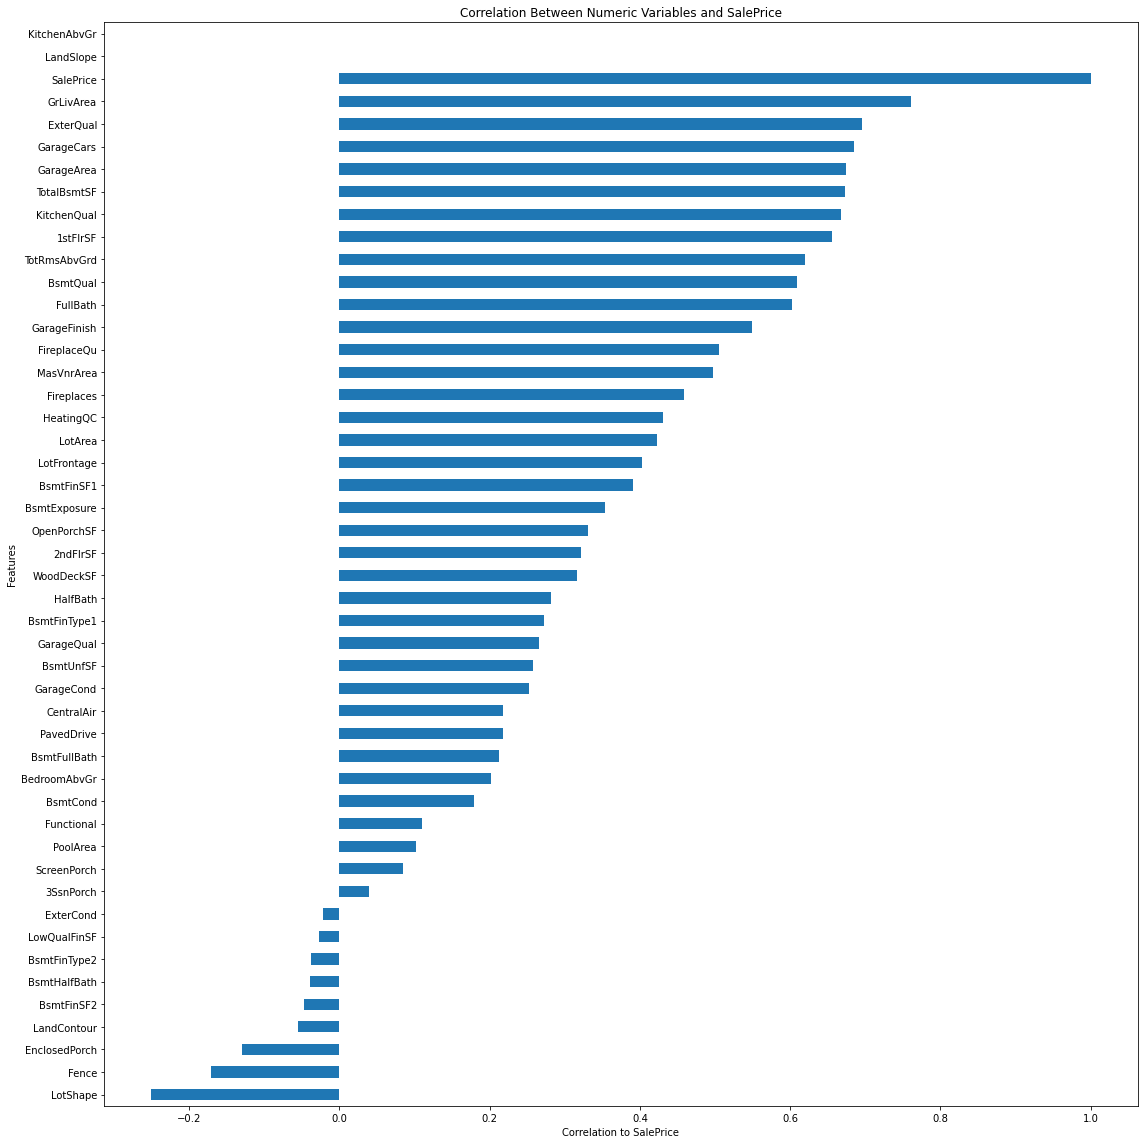

In [46]:
# Checking the correlation using horizontal barplot
corr = Housing.corr()
plt.figure(figsize=(16,16));
corr["SalePrice"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation Between Numeric Variables and SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

#### <font color="blue">Inference from the plot:
> - Above ground living area has the highest positve correlation with the salesprice.
> - Higher the irregularity of the lot shape lower the salesprice.

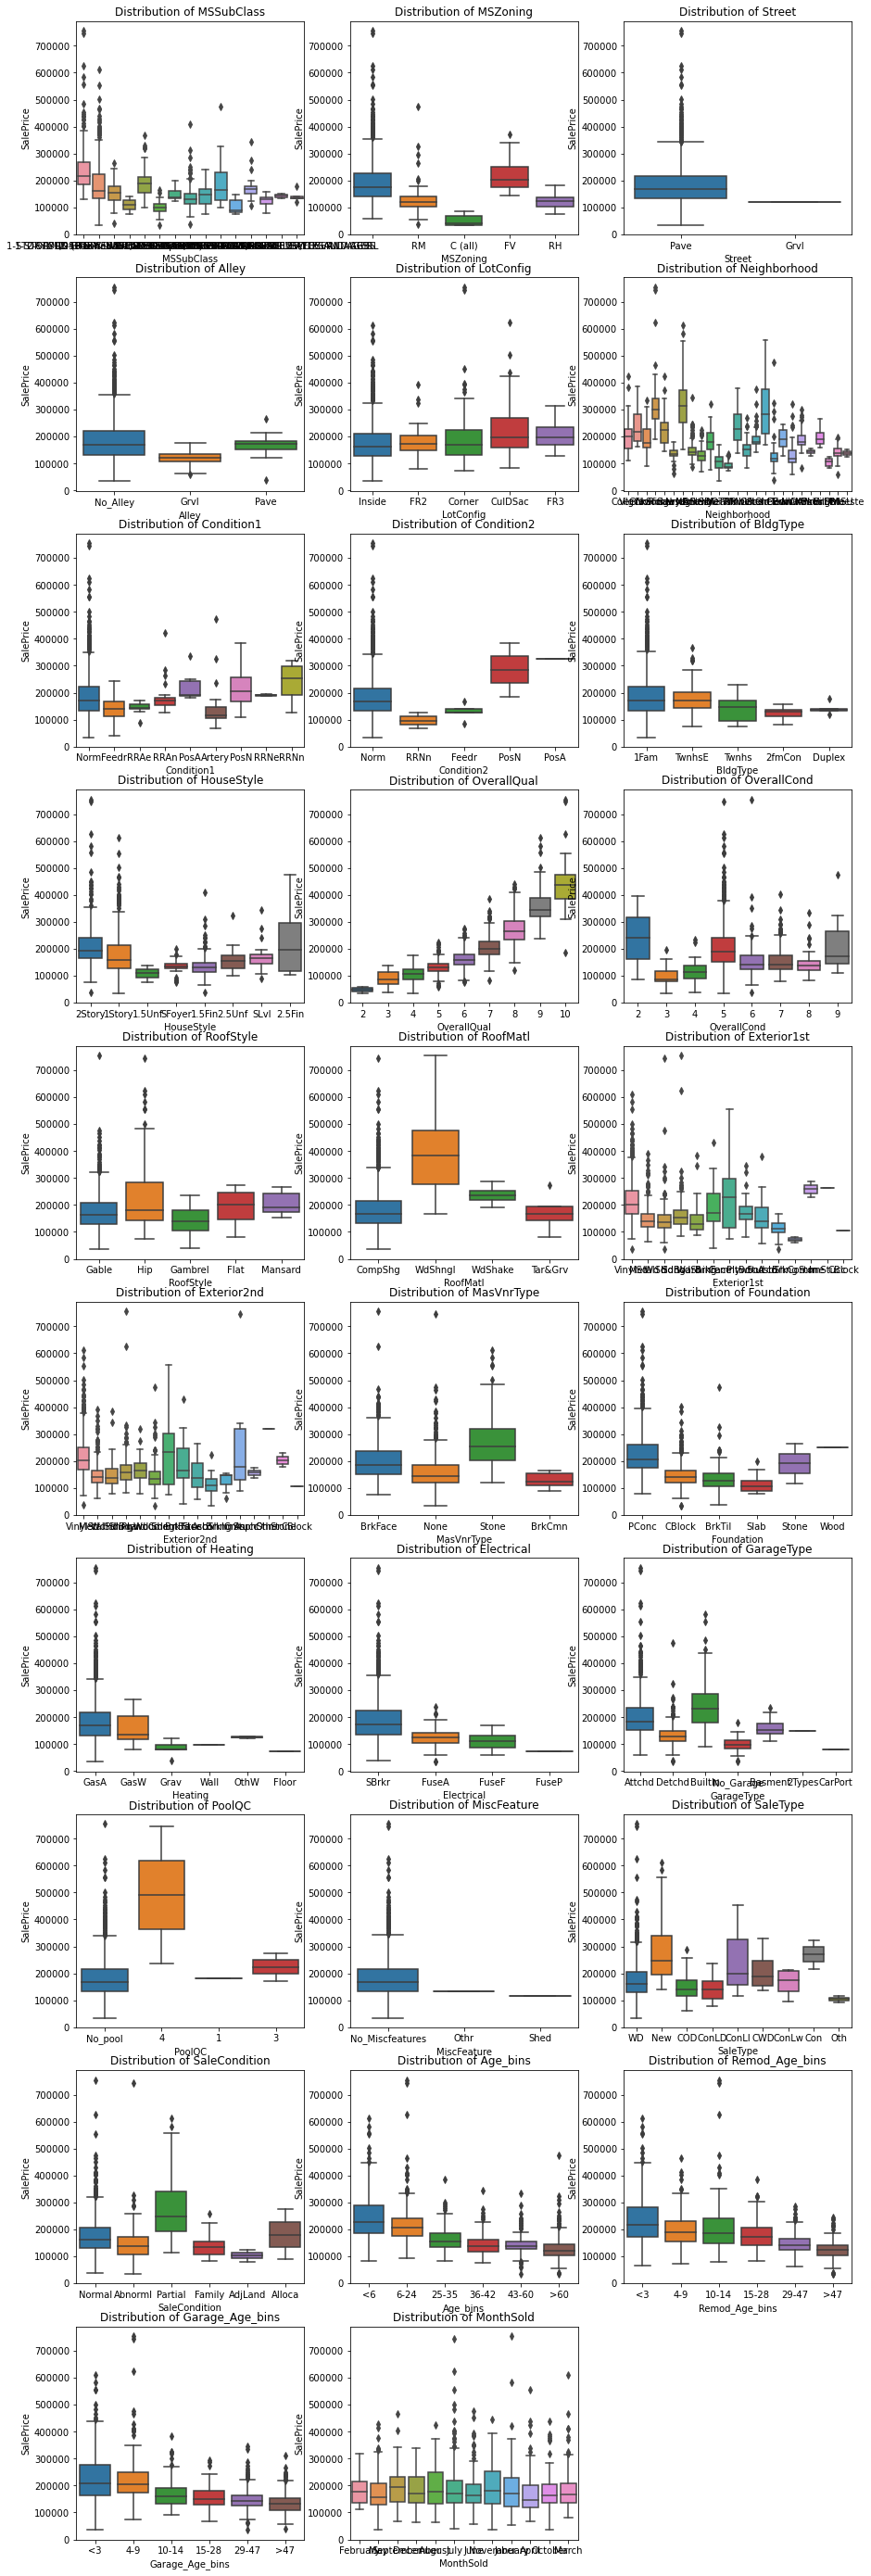

In [47]:
# Plotting boxplot for categorical features
def boxplot(a,b):
    plt.subplot(10,3,a)
    plt.title("Distribution of"+" "+b)
    sns.boxplot(data=Housing, x=b, y="SalePrice")
plt.figure(figsize=[15,50])    
ax = 1
for i in Cat_df:
    boxplot(ax,i)
    ax+=1

#### <font color="blue">Inference from the plot:
> - The overall quality increase with increase in salesprice.
> - If the age increases the salesprice decreases.
> - If the remodelling age increases the salesprice decreases.
> - The month sold has no any relation with the salesprice.

### Data Preparation

In [48]:
# Checking the street feature 
Housing["Street"].value_counts()

Pave    1251
Grvl       1
Name: Street, dtype: int64

#### <font color="blue">Suggestion:
> - The street feature is highly imbalanced with 99.9% majority category, so we can drop the feature.

In [49]:
# Dropping street feature
Housing.drop("Street", axis=1, inplace=True)

# After dropping street column lets create a new categorical dataframe
Cat_df = Housing.select_dtypes(include=["category","object"])

####  <font color="blue"> Dummy Variable Creation:

In [50]:
# Lets create dummy variables for all the categorical variables
Housing_dummies = pd.get_dummies(Cat_df, drop_first=True)
Housing_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,PoolQC_3,PoolQC_4,PoolQC_No_pool,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age_bins_6-24,Age_bins_25-35,Age_bins_36-42,Age_bins_43-60,Age_bins_>60,Remod_Age_bins_4-9,Remod_Age_bins_10-14,Remod_Age_bins_15-28,Remod_Age_bins_29-47,Remod_Age_bins_>47,Garage_Age_bins_4-9,Garage_Age_bins_10-14,Garage_Age_bins_15-28,Garage_Age_bins_29-47,Garage_Age_bins_>47,MonthSold_August,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [51]:
# Now we can drop the original features from the housing dataset
Housing.drop(list(Cat_df.columns), axis=1, inplace=True)

In [52]:
# Lets concatenate the dummies with the dataset
Housing = pd.concat([Housing, Housing_dummies], axis=1)

In [53]:
# After creating dummy variables the shape of our dataset become
print("The shape of the dataset after creating dummies is", Housing.shape)

The shape of the dataset after creating dummies is (1252, 236)


####  <font color="blue"> Train Test Split:

In [54]:
# Splitting into test and train set
df_train,df_test=train_test_split(Housing,train_size=0.70, test_size=0.30, random_state=100)
print(df_train.shape)
print(df_test.shape)

(876, 236)
(376, 236)


In [55]:
# Creating X_train and y_train
y_train = df_train.pop("SalePrice")
X_train = df_train

# Checking the shape
print(X_train.shape)
print(y_train.shape)

(876, 235)
(876,)


In [56]:
# Creating X_test and y_test
y_test = df_test.pop("SalePrice")
X_test = df_test

# Checking the shape
print(X_test.shape)
print(y_test.shape)

(376, 235)
(376,)


####  <font color="blue"> Scaling the features:

In [57]:
Num_df.columns[:-1]

Index(['LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LandSlope', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal'],
      dtype='object', name='Features')

In [58]:
# Lets call the function
scaler = MinMaxScaler()

# Numeric columns without the target variable is
Num_cols = Num_df.columns[:-1]

# fitting and transforming the train dataset
X_train[Num_cols] = scaler.fit_transform(X_train[Num_cols])
X_test[Num_cols] = scaler.transform(X_test[Num_cols])

In [59]:
# Checking the max and min values
X_train.describe()

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,PoolQC_3,PoolQC_4,PoolQC_No_pool,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age_bins_6-24,Age_bins_25-35,Age_bins_36-42,Age_bins_43-60,Age_bins_>60,Remod_Age_bins_4-9,Remod_Age_bins_10-14,Remod_Age_bins_15-28,Remod_Age_bins_29-47,Remod_Age_bins_>47,Garage_Age_bins_4-9,Garage_Age_bins_10-14,Garage_Age_bins_15-28,Garage_Age_bins_29-47,Garage_Age_bins_>47,MonthSold_August,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_

### Model Buliding